# Lista 6

In [107]:
import numpy as np
import matplotlib.pyplot as plt

### Questão 1

In [108]:
def encontra_funcao(k, x, y):
    M = np.vander(x,increasing=True)
    a = np.linalg.solve(M,y)
    return a

In [109]:
def int_pol_partes (k, x, y):
    num_funcoes = int((len(x)-1)/k)

    matriz_coeficientes = []

    for i in range(0, len(x)-1, k):
        matriz_coeficientes.append(encontra_funcao(k, x[i:i+k+1], y[i:i+k+1]))
    
    return matriz_coeficientes

In [110]:
def p1(coefs, x):
    return coefs[0] + coefs[1]*x + coefs[2]*x*x

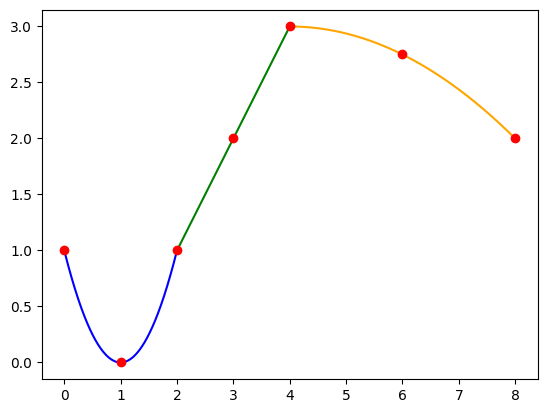

In [111]:
x=np.array([0,1,2,3,4,6,8])
y=np.array([1,0,1,2,3,2.75,2])
k = 2

A = int_pol_partes(k, x, y)

dom1 = np.linspace(0,2,1000)
dom2 = np.linspace(2,4,1000)
dom3 = np.linspace(4,8,1000)
im1  = np.array([p1(A[0], t) for t in dom1])
im2  = np.array([p1(A[1], t) for t in dom2])
im3  = np.array([p1(A[2], t) for t in dom3])

plt.plot(dom1,im1,'b')
plt.plot(dom2,im2,'g')
plt.plot(dom3,im3,'orange')
plt.plot(x,y,'ro')
plt.show()

### Questão 2

$y = a_0 + \frac {a_1} {x} + \frac {a_2} {x^2}$

Sabendo que temos três pontos $(x_0, y_0)$, $(x_1, y_1)$ e $(x_2, y_2)$. Logo podemos montar o seguite sistema:

$$\begin{cases}
y_0 = a_0 + \frac {a_1} {x_0} + \frac {a_2} {x_0^2}\\
y_1 = a_0 + \frac {a_1} {x_1} + \frac {a_2} {x_1^2}\\
y_2 = a_0 + \frac {a_1} {x_2} + \frac {a_2} {x_2^2}
\end{cases}$$

Sabendo disso e sabendo também que podemos organizar o sistema da seguinte maneira:

$\begin{bmatrix}
1& \frac {1} {x_0}&\frac {1} {x_0^2}\\
1& \frac {1} {x_1}&\frac {1} {x_1^2}\\
1& \frac {1} {x_2}&\frac {1} {x_2^2}
\end{bmatrix}$ $\begin{bmatrix}
a_0\\
a_1\\
a_2
\end{bmatrix}$ = $\begin{bmatrix}
y_0\\
y_1\\
y_2
\end{bmatrix}$

Logo, podemos solucionar o problema resolvendo esse sistema. Para facilitar, será utilizado a ferramenta `linalg.solve()` da biblioteca numpy.

In [112]:
def interpolacao_reciprocas(x, y):
    n = len(x)

    # Criando a matriz dos x's
    X = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            X[i, j] = 1/(x[i]**(j))

    b = y.copy()

    coefs = np.linalg.solve(X, b)

    return(coefs)

In [113]:
def p2(coefs, x):
    return coefs[0] + coefs[1]/x + coefs[2]/(x*x)

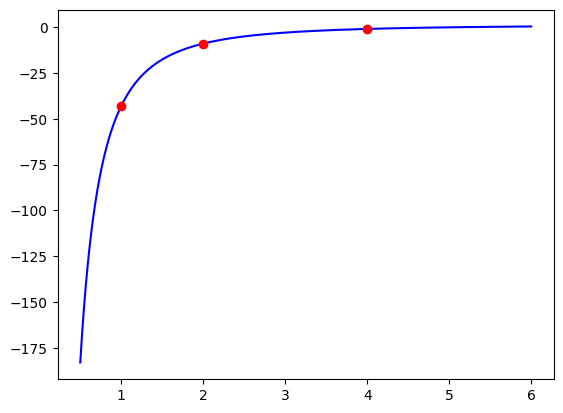

In [114]:
x = [1, 2, 4]
y = [-43, -9, -1]

coefs = interpolacao_reciprocas(x, y)

dom = np.linspace(0.5,6,1000)
im = [p2(coefs, t) for t in dom]

plt.plot(dom,im,'b')
plt.plot(x,y,'ro')
plt.show()